# EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# Determine your current working directory:
os.getcwd()

'C:\\Users\\vijay.agrawal\\Final Project'

In [3]:
# Read the files that were generated as a result of the data cleanup exercise:
df_products=pd.read_csv("df_products_clean.csv")
df_stores = pd.read_csv("df_stores_clean.csv")
df_transactions=pd.read_csv("df_transactions_full_clean.csv")

## Explore df_products

In [4]:
df_products.columns.tolist()

['DBSKU', 'DEPARTMENT', 'PRODUCT_CLASS']

In [5]:
df_products['DBSKU'].nunique()

24292

### There are 24292 SKUS in total

In [6]:
df_products.groupby(['DEPARTMENT']).agg({'DBSKU' : ['count'] })

,DBSKU
,count
DEPARTMENT,
10,14179
12,10113


### There are 2 departments, with Dept 10 having approx 40% more SKUs

In [7]:
df_products.groupby(['DEPARTMENT', 'PRODUCT_CLASS']).agg({'DBSKU' : ['count'] })

DBSKU
                         count
DEPARTMENT PRODUCT_CLASS      
10         10_20          4159
           10_21          2555
           10_30           155
           10_31           681
           10_32           280
           10_40          2648
           10_41           615
           10_42           281
           10_5            480
           10_50           989
           10_51           208
           10_52           266
           10_6            860
           10_99             2
12         12_20          2891
           12_21          1241
           12_30           198
           12_31           630
           12_32           253
           12_37             1
           12_40          2040
           12_41           359
           12_42           149
           12_5            298
           12_50           996
           12_51           257
           12_52           306
           12_6            488
           12_99             6

### Product subclass 20, 21 in both departments have max SKUs

## Explore df_stores

In [8]:
df_stores.columns.tolist()

['LOC_INDT',
 'LOC_INDT_SEQ',
 'CITY',
 'STATE',
 'POSTAL_CD',
 'STORE_SIZE',
 'STORE_TYPE_MALL',
 'STORE_TYPE_STRIP',
 'STORE_TYPE_OTHER',
 'STATE_NAME',
 'MEDIAN_HOUSEHLD_INCOME',
 'PCNT_WOMEN_EMPLOYED',
 'MEDIAN_HOUSEHLD_INCOME_BINS']

Text(0, 0.5, 'Number of Stores')

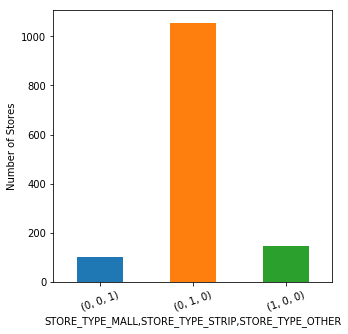

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
df_stores.groupby(['STORE_TYPE_MALL', 'STORE_TYPE_STRIP', 'STORE_TYPE_OTHER'])['LOC_INDT'].agg('count').plot.bar(
    rot=20, ax=ax)
ax.set_ylabel('Number of Stores')

### Strip Stores far outweigh Mall stores

## Distribution of Stores across Cities:

In [10]:
df_stores['POSTAL_CD'].value_counts().nlargest(4).sort_values(ascending=False)

10901    152
65616      8
92508      7
43062      6
Name: POSTAL_CD, dtype: int64

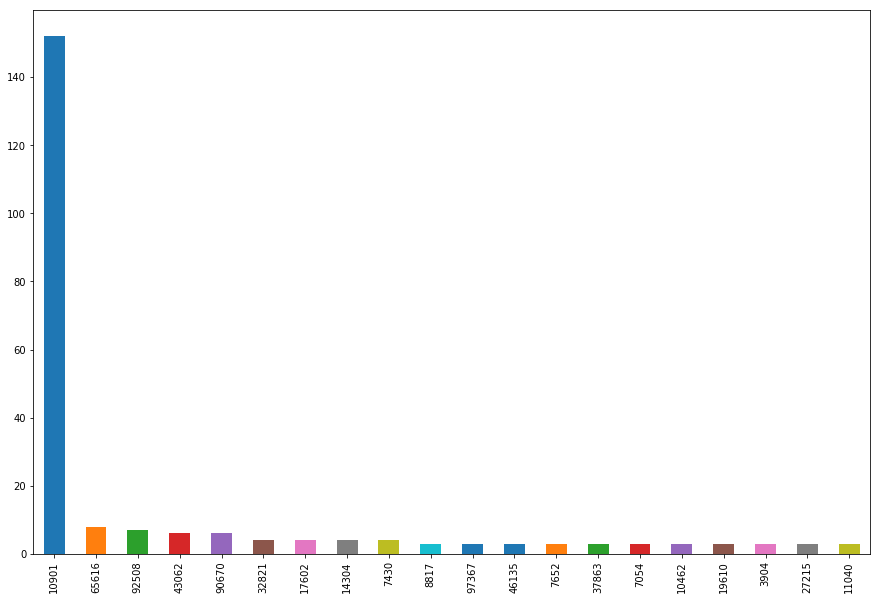

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
df_stores['POSTAL_CD'].value_counts().nlargest(20).sort_values(ascending=False).plot.bar(ax=ax)

In [12]:
df_stores [ (df_stores['POSTAL_CD'] == 10901) | (df_stores['POSTAL_CD'] == 65616)][['CITY', 'STATE']].drop_duplicates()

,CITY,STATE
5,SUFFERN,NY
211,BRANSON,MO
610,BRANSON,MO
803,Suffern,NY
1273,SUFFERN,NY


### SUFFERN, NY has max number of stores (152). The next city (BRANSON, MO) Has only 8 stores! 

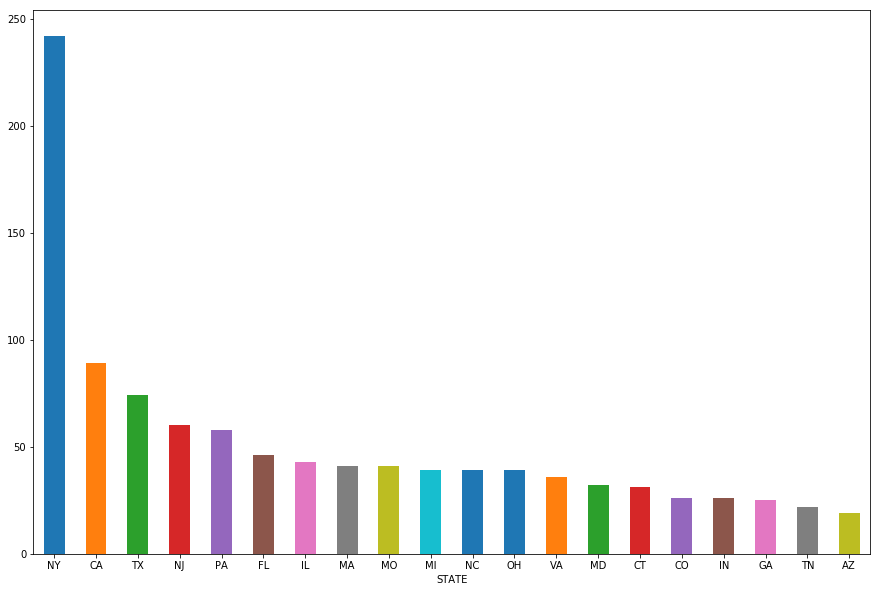

In [13]:
# Number of stores by STate (top 10)
fig, ax = plt.subplots(figsize=(15, 10))
df_stores.groupby(['STATE'])['LOC_INDT'].agg('count').sort_values(ascending=False).nlargest(20).plot.bar(rot=0, ax=ax)

### NY State has very high concentration of Stores

## Explore df_transactions

 Merge the files together to generate a single file for analysing data

In [14]:
# Merge df_transactions and df_products to create a single file called df_final - 
# the common column is DBSKU and hence the merge has to happen based on DBSKU. 
df_final = pd.merge(df_transactions, df_products, on='DBSKU')

In [15]:
# Merge df_stores to the df_final dataset - the common column is LOC_INDT 
# and hence the merge has to happen based on LOC_INDT. 
df_final = pd.merge(df_final, df_stores, on='LOC_INDT')

In [16]:
# Verify that the files have been merged:
df_final.head(3)

,DAY_DT,LOC_INDT,DBSKU,ONLINE_FLAG,TOTAL_SALES,TOTAL_UNITS_SOLD,TOTAL_SALES_PRFT,TOTAL_COST,HOLIDAY,MONTH,...,STATE,POSTAL_CD,STORE_SIZE,STORE_TYPE_MALL,STORE_TYPE_STRIP,STORE_TYPE_OTHER,STATE_NAME,MEDIAN_HOUSEHLD_INCOME,PCNT_WOMEN_EMPLOYED,MEDIAN_HOUSEHLD_INCOME_BINS
0,2015-09-26,1218,466896,0,16.8,1.0,1.3,15.5,0,9,...,SC,29229,3100,0,0,1,South Carolina,52815,0.57,2
1,2015-08-31,1218,466896,0,33.6,2.0,2.6,31.0,0,8,...,SC,29229,3100,0,0,1,South Carolina,52815,0.57,2
2,2015-09-08,1218,466896,0,21.0,1.0,5.5,15.5,0,9,...,SC,29229,3100,0,0,1,South Carolina,52815,0.57,2


In [17]:
# Verify the dimensions of the merged dataset = as seen below, there are over 7 million records in 31 features. 
df_final.shape

(13043875, 29)

In [18]:
# Determine the columns in the merged dataset:
df_final.columns.tolist()

['DAY_DT',
 'LOC_INDT',
 'DBSKU',
 'ONLINE_FLAG',
 'TOTAL_SALES',
 'TOTAL_UNITS_SOLD',
 'TOTAL_SALES_PRFT',
 'TOTAL_COST',
 'HOLIDAY',
 'MONTH',
 'SEASON',
 'UNIT_COST_PRICE',
 'UNIT_SELLING_PRICE',
 'PROFIT_PER_UNIT',
 'FULL_PRICE_IND',
 'DEPARTMENT',
 'PRODUCT_CLASS',
 'LOC_INDT_SEQ',
 'CITY',
 'STATE',
 'POSTAL_CD',
 'STORE_SIZE',
 'STORE_TYPE_MALL',
 'STORE_TYPE_STRIP',
 'STORE_TYPE_OTHER',
 'STATE_NAME',
 'MEDIAN_HOUSEHLD_INCOME',
 'PCNT_WOMEN_EMPLOYED',
 'MEDIAN_HOUSEHLD_INCOME_BINS']

In [19]:
# Determine the date range of the merged file - minimum date:
df_final['DAY_DT'].min()

'2015-07-26'

In [20]:
# Determine the date range of the merged file - maximum date:
df_final['DAY_DT'].max()

'2018-07-08'

### Data is for 3 years from *July 2015 to July 2018.*

 ## Sales data: Summary

In [21]:
df_final[['UNIT_COST_PRICE', 'UNIT_SELLING_PRICE', 'PROFIT_PER_UNIT']].describe().apply(
    lambda s: s.apply(lambda x: format(x, 'g')))

,UNIT_COST_PRICE,UNIT_SELLING_PRICE,PROFIT_PER_UNIT
count,1.30439e+07,1.30439e+07,1.30439e+07
mean,17.3285,37.1886,19.8601
std,3.59478,13.3553,12.6204
min,0.02,0.01,-55.01
25%,15,27,9.74
50%,17,38.4,21.75
75%,19.5,46,29
max,62.48,150,100.23


As seen in the table above, we have products sold between 1 cent and 150 USD with transactions making negative profits and profit as high as 94 USD.

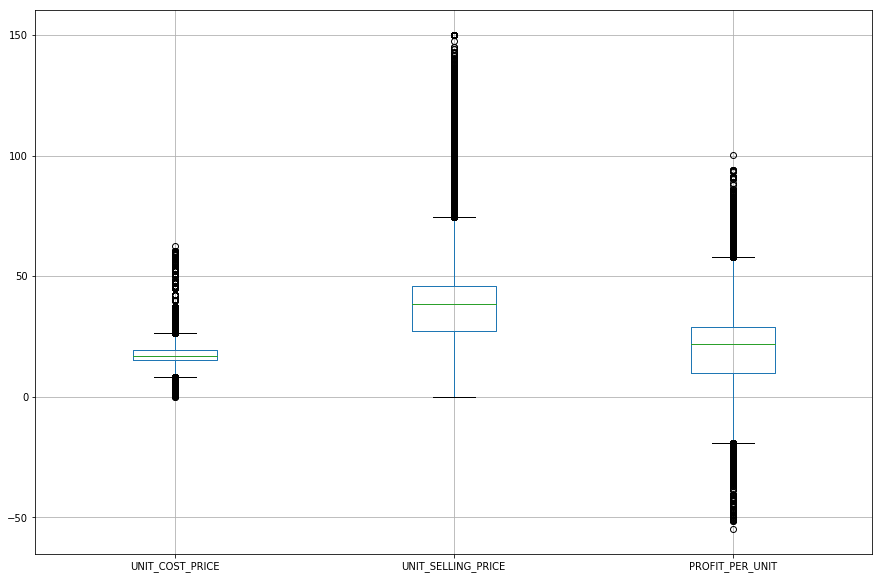

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
df_final.boxplot(ax=ax, column=['UNIT_COST_PRICE',
 'UNIT_SELLING_PRICE',
 'PROFIT_PER_UNIT'])

**Majority of Cost Price is in a narrow range of 15 to 19 USD**

**Sale Price Per Unit majority ranges between 37-46 but has many outliers**

**Profit Per Unit has a wide range from 9-21 (and many loss making transactions)**

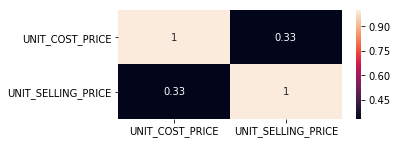

In [23]:
plt.figure(figsize = (5,2))
cols = ['UNIT_COST_PRICE','UNIT_SELLING_PRICE']
sns.heatmap(df_final[cols].corr(),annot = True)

In [24]:
# Lets look at top 20 transactions with most profit
df_final.nlargest(20, columns='PROFIT_PER_UNIT')

,DAY_DT,LOC_INDT,DBSKU,ONLINE_FLAG,TOTAL_SALES,TOTAL_UNITS_SOLD,TOTAL_SALES_PRFT,TOTAL_COST,HOLIDAY,MONTH,...,STATE,POSTAL_CD,STORE_SIZE,STORE_TYPE_MALL,STORE_TYPE_STRIP,STORE_TYPE_OTHER,STATE_NAME,MEDIAN_HOUSEHLD_INCOME,PCNT_WOMEN_EMPLOYED,MEDIAN_HOUSEHLD_INCOME_BINS
6505749,2016-07-11,1303,2339580,0,243.0,2.0,200.46,42.54,0,7,...,MN,55369,3100,0,1,0,Minnesota,71587,0.66,5
1747635,2016-01-19,520,2965673,0,150.0,1.0,94.00,56.00,0,1,...,IA,52241,3600,0,1,0,Iowa,62270,0.63,4
3766875,2016-01-24,396,2965673,0,150.0,1.0,94.00,56.00,0,1,...,MO,64801,3200,0,1,0,Missouri,58111,0.60,3
9784398,2015-09-14,4150,2965673,1,150.0,1.0,94.00,56.00,0,9,...,IN,46135,3400,0,0,1,Indiana,56653,0.59,2
9784401,2015-11-16,4150,2965673,1,150.0,1.0,94.00,56.00,0,11,...,IN,46135,3400,0,0,1,Indiana,56653,0.59,2
9784394,2015-08-21,4150,2965673,1,150.0,1.0,93.75,56.25,0,8,...,IN,46135,3400,0,0,1,Indiana,56653,0.59,2
9784393,2015-08-06,4150,2965673,1,150.0,1.0,93.50,56.50,0,8,...,IN,46135,3400,0,0,1,Indiana,56653,0.59,2
9784399,2015-07-27,4150,2965673,1,150.0,1.0,93.00,57.00,0,7,...,IN,46135,3400,0,0,1,Indiana,56653,0.59,2
391173,2015-11-25,375,2991174,0,150.0,1.0,91.00,59.00,0,11,...,FL,34741,3600,0,1,0,Florida,52159,0.54,2
391568,2016-04-10,375,2116558,0,150.0,1.0,91.00,59.00,0,4,...,FL,34741,3600,0,1,0,Florida,52159,0.54,2


**1. The most profitable transactions were spread across cities and store types.**

**2. They were betweeb 2015-16.**

**3. Most transactions had only 1 unit sold.**

**4. Mix of online and retail, all (but one) were sold at Full Price.**

**5. Cost per unit is signicantly low when compared to the unit selling price.**

In [25]:
# Lets look at bottom 20 transactions with most profit
df_final.nsmallest(20, columns='PROFIT_PER_UNIT')

,DAY_DT,LOC_INDT,DBSKU,ONLINE_FLAG,TOTAL_SALES,TOTAL_UNITS_SOLD,TOTAL_SALES_PRFT,TOTAL_COST,HOLIDAY,MONTH,...,STATE,POSTAL_CD,STORE_SIZE,STORE_TYPE_MALL,STORE_TYPE_STRIP,STORE_TYPE_OTHER,STATE_NAME,MEDIAN_HOUSEHLD_INCOME,PCNT_WOMEN_EMPLOYED,MEDIAN_HOUSEHLD_INCOME_BINS
3812274,2017-01-18,69,2116558,0,3.99,1.0,-55.01,59.0,0,1,...,FL,33034,4100,0,1,0,Florida,52159,0.54,2
43439,2017-01-18,728,2991208,0,3.99,1.0,-51.51,55.5,0,1,...,CO,81008,3200,0,1,0,Colorado,71720,0.63,5
12687333,2017-01-19,1320,2991208,0,3.99,1.0,-51.51,55.5,0,1,...,NV,89801,2400,0,1,0,Nevada,55662,0.59,2
412111,2017-01-21,328,507673,0,3.99,1.0,-51.01,55.0,0,1,...,NH,3103,3800,0,1,0,New Hampshire,77000,0.63,5
1274965,2017-01-08,1327,2116558,0,7.99,1.0,-51.01,59.0,0,1,...,NY,11967,3200,0,1,0,New York,61741,0.59,3
6587637,2017-01-19,307,431767,0,3.99,1.0,-51.01,55.0,0,1,...,NY,10594,4200,0,1,0,New York,61741,0.59,3
6640750,2017-01-20,1194,507673,0,7.98,2.0,-102.02,110.0,0,1,...,NJ,7866,2600,1,0,0,New Jersey,71222,0.60,5
7995885,2016-12-29,177,2116558,0,7.99,1.0,-51.01,59.0,0,12,...,TX,77385,3800,0,1,0,Texas,59041,0.58,3
11554119,2017-01-25,1255,507673,0,3.99,1.0,-51.01,55.0,0,1,...,NY,11239,3300,0,1,0,New York,61741,0.59,3
12071262,2016-12-28,1337,2116558,0,8.02,1.0,-50.98,59.0,0,12,...,MA,2090,2900,0,1,0,Massachusetts,72421,0.63,5


**1. Cost Per Unit was similar to the ones that were most profitable transactions.** 

**2. They were sold at less than Full Price and they were heavily discounted.**

**3. Most transactions were carried out in retail/stirp stores.**

**4. Most transactions were carried out in 2017, spread across locations.**

# Explore range of number of units  sold across transactions

In [26]:
df_final['TOTAL_UNITS_SOLD'].value_counts().head(10)

1.0     12178904
2.0       624472
3.0        79953
4.0        34595
5.0        23715
6.0        17751
7.0        14252
8.0        11256
9.0         8974
10.0        7406
Name: TOTAL_UNITS_SOLD, dtype: int64

**Out of the 13M records, >12M records are for 1 unit.**

**Selling more than one unit in a transaction is the natual and easy way to increase topline and bottomline sales.** 

## Does HOLIDAY have an impact on sales?

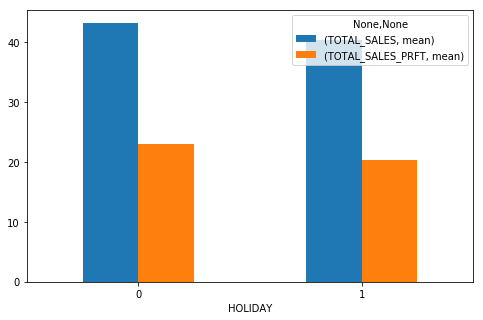

In [27]:
# Compare the mean of TOTAL SALES and TOTAL_SALES_PROFIT on holidays and non holidays - 
# as seen below, the values are more or less similar. 
fig, ax = plt.subplots(figsize=(8, 5))
df_final.groupby(['HOLIDAY']).agg(
    {'TOTAL_SALES' : ['mean'], 'TOTAL_SALES_PRFT' : ['mean'] }).plot.bar(ax=ax, rot=0)

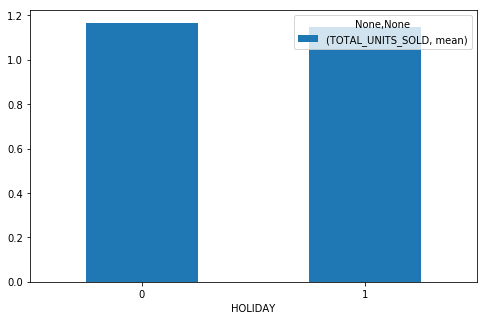

In [28]:
# Total units sold on hoidays and non holidays - 
# holidays occur only 10 days/year and hence the unit sold leans more towards non holidays. 
fig, ax = plt.subplots(figsize=(8, 5))
df_final.groupby(['HOLIDAY']).agg(
    {'TOTAL_UNITS_SOLD' : ['mean'] }).plot.bar(ax=ax, rot=0)

### No significant difference between Holiday and Non Holiday Mean Sales across products

## Explore Sales and Profits by State

In [29]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2=df_final.groupby(['STATE']).agg(
    {'TOTAL_COST' : ['sum'], 'TOTAL_SALES' : ['sum'], 'TOTAL_SALES_PRFT' : ['sum'] })

In [30]:
df2.columns = ['_'.join(x) for x in df2.columns.ravel()]
df2.columns.tolist()

['TOTAL_COST_sum', 'TOTAL_SALES_sum', 'TOTAL_SALES_PRFT_sum']

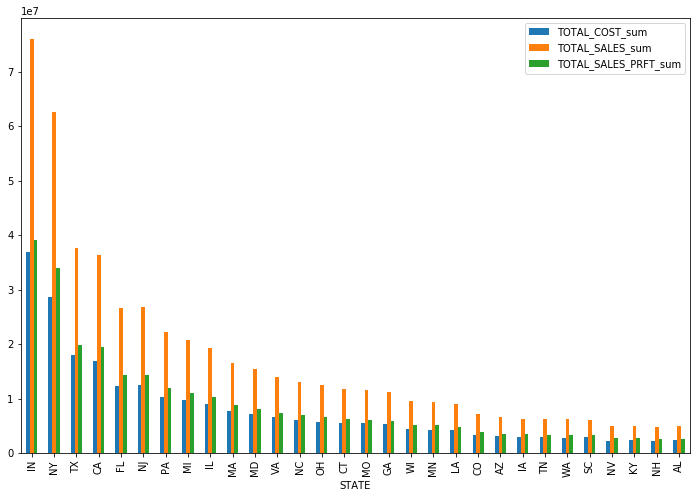

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
df2.sort_values(
    ['TOTAL_COST_sum', 'TOTAL_SALES_sum','TOTAL_SALES_PRFT_sum'], ascending=False).nlargest( 
    30, columns='TOTAL_SALES_PRFT_sum').plot.bar(ax=ax)

**Sales and Profits in Indiana State are higher than NY**

**but number of Stores in IN are only 26 (compared to 242 in NY)!!**

**Sales and Profits per store is very high in Indiana. Consider opening more stores there**

In [32]:
df2.to_csv("sale_by_state")

## Explore Sales by City

In [33]:
df2=df_final.groupby(['CITY']).agg(
    {'TOTAL_COST' : ['sum'], 'TOTAL_SALES' : ['sum'], 'TOTAL_SALES_PRFT' : ['sum'] })

In [34]:
df2.columns = ['_'.join(x) for x in df2.columns.ravel()]
df2.columns.tolist()

['TOTAL_COST_sum', 'TOTAL_SALES_sum', 'TOTAL_SALES_PRFT_sum']

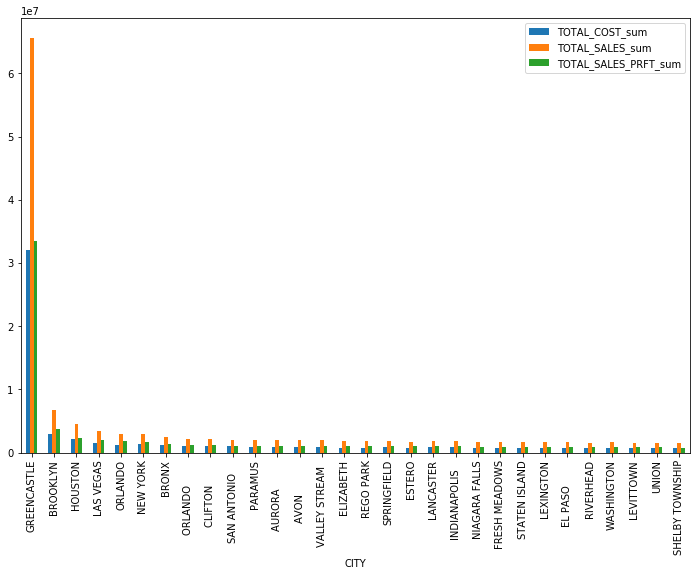

In [35]:
# Top 30 cities in the US by mean sales profit - Greencastle is the top city in the US with significant profits for the retailer. 
# Greencastle has 4 times mean sales compared to next closest city; all other cities have similar avg cost, price and profit numbers. 
fig, ax = plt.subplots(figsize=(12, 8))
df2.sort_values(
    ['TOTAL_COST_sum', 'TOTAL_SALES_sum','TOTAL_SALES_PRFT_sum'], ascending=False).nlargest( 
    30, columns='TOTAL_SALES_PRFT_sum').plot.bar(ax=ax)

## Greencastle, Indiana has very high sales and profits (almost 10x the closest city, Brooklyn)

# Does Online flag impact profits?

Text(0, 0.5, 'Average Profit Per Unit')

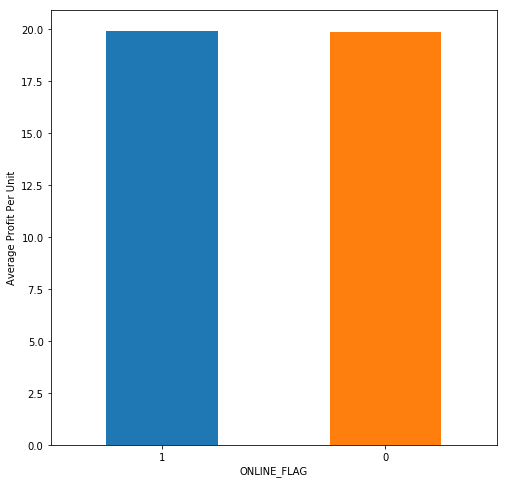

In [36]:
# Average profit per unit by Online flag - as seen below, there is no significant difference
# in mean profit based on the online flag. 
fig, ax = plt.subplots(figsize=(5, 5))
ax=df_final.groupby(['ONLINE_FLAG'])['PROFIT_PER_UNIT'].agg('mean').sort_values(ascending=False).plot.bar(
    rot=0, figsize=(8, 8))
ax.set_ylabel("Average Profit Per Unit")

## No significant impact of ONLINE Sale on avg profit across products

# Does FULL_PRICE_IND impact profits?

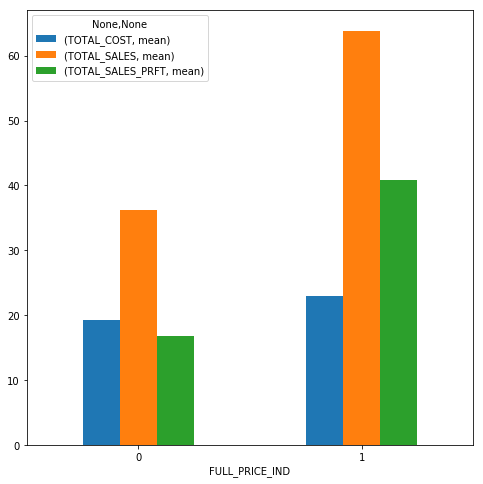

In [37]:
# Average profit from sales based on full price indicator - as seen below,
# the full price indicator does impact profits and the total value of sales is also high. 
fig, ax = plt.subplots(figsize=(8, 8))
df_final.groupby(['FULL_PRICE_IND']).agg(
    {'TOTAL_COST' : ['mean'], 'TOTAL_SALES' : ['mean'], 'TOTAL_SALES_PRFT' : ['mean'] }).plot.bar(
    ax=ax, rot=0, figsize=(8, 8))

## Full Price Indicator clearly has impact on Sales and Profits

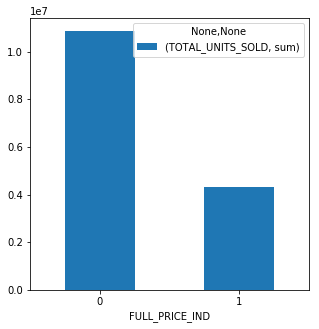

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
df_final.groupby(['FULL_PRICE_IND']).agg(
    {'TOTAL_UNITS_SOLD' : ['sum'] }).plot.bar(ax=ax, rot=0)

## Selling at Full Price impacts the # units sold.Total Units Sold 
## Approx 1/3rd less units sold at Full Price (compared to discounted)

# Profits and Sales distribution across Product Class and Department

Text(0, 0.5, 'Average Profit')

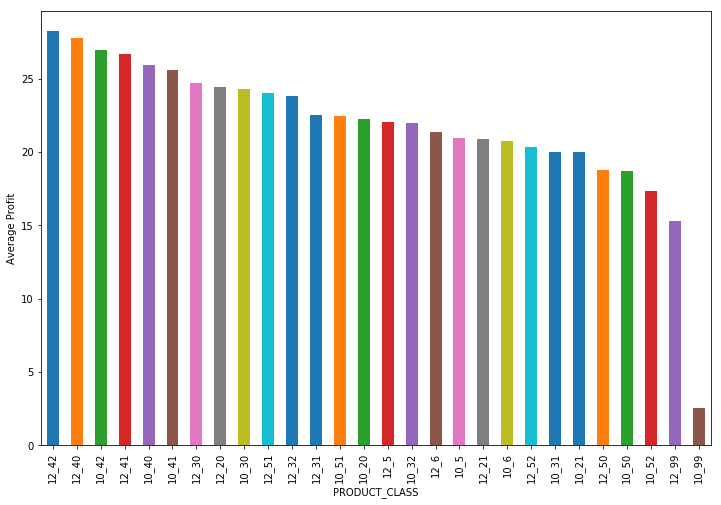

In [39]:
# Subclasses 40, 41, 42 raked in most profits across both the departements - 10 and 12:
fig, ax = plt.subplots(figsize=(12, 8))
df_final.groupby(['PRODUCT_CLASS'])['TOTAL_SALES_PRFT'].agg('mean').sort_values(
    ascending=False).plot.bar(ax=ax)
ax.set_ylabel("Average Profit")

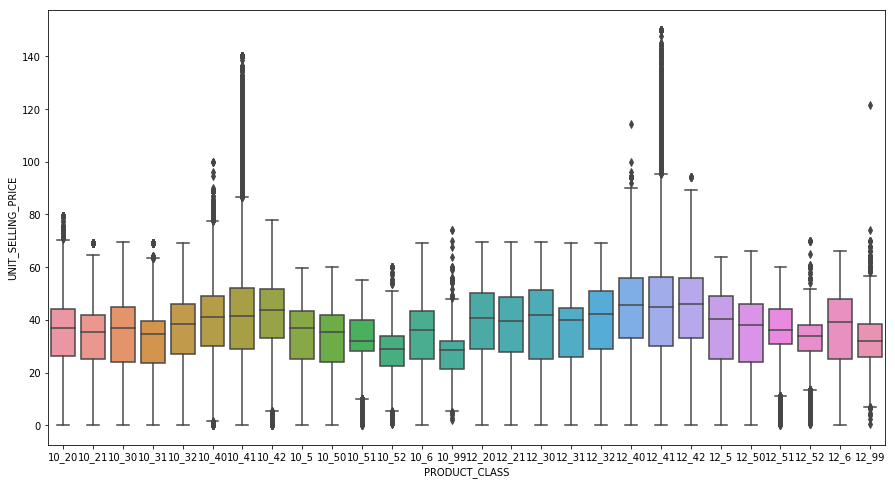

In [40]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y='UNIT_SELLING_PRICE', x='PRODUCT_CLASS', data=df_final, ax=ax)

## Profits across product classes is more or less distributed, with subclasses 40, 41, 42 in departments 10 and 12 doing better than others

# Does Season have an impact on Sales and Profit?

Text(0.5, 0, '')

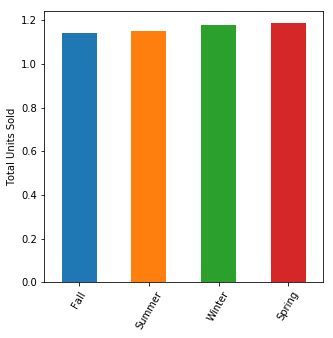

In [41]:
# Note that the units sold does NOT vary by season:
seasons=['Winter', 'Spring', 'Summer', 'Fall']
fig, ax = plt.subplots(figsize=(5, 5))
df_final.groupby(['SEASON'])['TOTAL_UNITS_SOLD'].agg('mean').sort_values(ascending=True).plot.bar(ax=ax, rot=60)
ax.set_ylabel('Total Units Sold')
curlabels = [ w.get_text() for w in ax.get_xticklabels()]
newlabels=[]
for i in curlabels:
    newlabels.append (seasons[int(i)-1])
ax.set_xticklabels(newlabels)
ax.set_xlabel('')

Text(0.5, 0, '')

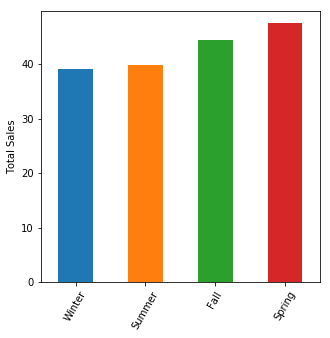

In [42]:
# As seen in the graph below, total sale value is higher in Fall (4) and Spring (2) and the total
# sale value is lower in Winter (1) and Summer (3) - off season offers?
fig, ax = plt.subplots(figsize=(5, 5))
df_final.groupby(['SEASON'])['TOTAL_SALES'].agg('mean').sort_values(ascending=True).plot.bar(rot=60, ax=ax)
#ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.set_ylabel('Total Sales')
curlabels = [ w.get_text() for w in ax.get_xticklabels()]
newlabels=[]
for i in curlabels:
    newlabels.append (seasons[int(i)-1])
ax.set_xticklabels(newlabels)
ax.set_xlabel('')

###  Total sale value is higher in Fall (4) and Spring (2) and the total
### sale value is lower in Winter (1) and Summer (3) - off season offers?

Text(0.5, 0, '')

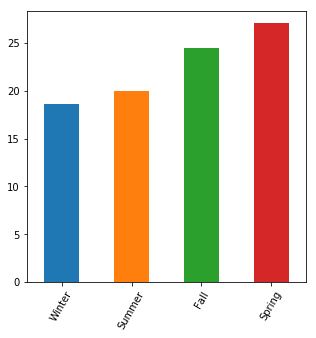

In [43]:
# Corresponding to the graph above, total sales profit is higher in Fall (4) and Spring (2) 
# and the total sale value is lower in Winter (1) and Summer (3) - off season offers?
fig, ax = plt.subplots(figsize=(5, 5))
df_final.groupby(['SEASON'])['TOTAL_SALES_PRFT'].agg('mean').sort_values(ascending=True).plot.bar(ax=ax, rot=60)
curlabels = [ w.get_text() for w in ax.get_xticklabels()]
newlabels=[]
for i in curlabels:
    newlabels.append (seasons[int(i)-1])
ax.set_xticklabels(newlabels)
ax.set_xlabel('')

## Does Department have impact on Selling price?

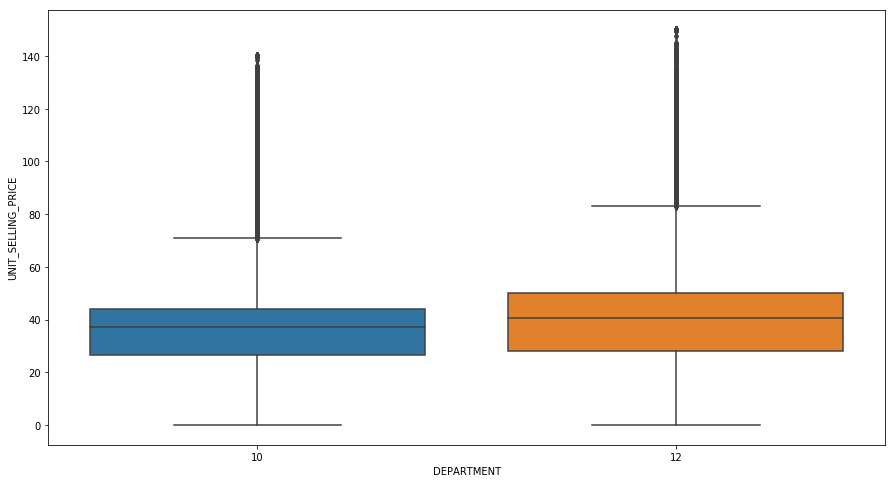

In [44]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y='UNIT_SELLING_PRICE', x='DEPARTMENT', data=df_final, ax=ax)

In [45]:
# https://intoli.com/blog/pandas-aggregation/
def flatten_aggregated_dataframe(
    gdf, concat_name=True, concat_separator='_', name_level=1, inplace=False):
    """
    Flatten aggregated DataFrame.

    Args:
        gdf: DataFrame obtained through aggregation.
        concat_name: Whether to concatenate original column name and
            aggregation function name in the case of MultiIndex columns.
        concat_separator: Which string to place between original column name
            and aggregation function name if concat_name is True.
        name_level: Which element of a column tuple to use in the case of 
            MultiIndex columns and concat_name == False. Should be 0 for 
            original column name and 1 for aggregation function name.
        inplace: Whether to modify the aggregated DataFrame directly 
            (or return a copy).
    """
    if not inplace:
        gdf = gdf.copy()
    if type(gdf.columns) == pd.core.index.MultiIndex:
        if concat_name:
            columns = [concat_separator.join(col) for col in gdf.columns]
        else:
            columns = [col[name_level % 2] for col in gdf.columns]
        gdf.columns = columns
    return gdf.reset_index()

In [46]:
flatten_aggregated_dataframe(
    df_final.groupby('DEPARTMENT')['TOTAL_SALES', 'TOTAL_SALES_PRFT'].agg({'sum':"sum"})).sort_values(
    by='sum_TOTAL_SALES_PRFT',ascending=False)

C:\Users\vijay.agrawal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,DEPARTMENT,sum_TOTAL_SALES,sum_TOTAL_SALES_PRFT
0,10,368909089.160,197881750.624
1,12,193478222.701,100679533.280


In [47]:
flatten_aggregated_dataframe(df_final.groupby('PRODUCT_CLASS')
    ['TOTAL_SALES', 'TOTAL_SALES_PRFT'].agg({'sum':"sum"})).sort_values(
    by='sum_TOTAL_SALES_PRFT',ascending=False)

,PRODUCT_CLASS,sum_TOTAL_SALES,sum_TOTAL_SALES_PRFT
0,10_20,131697892.549,71048445.015
14,12_20,63143856.790,33219229.634
5,10_40,33904070.655,18811910.198
7,10_42,29706594.470,16652159.011
1,10_21,32154026.130,16413969.853
6,10_41,24762991.640,12990334.865
19,12_40,22324901.850,11814538.708
4,10_32,21910802.640,11364741.677
12,10_6,21534001.140,11127103.620
3,10_31,19688630.310,10364957.330


# Impact of Product Class and Date on Sales

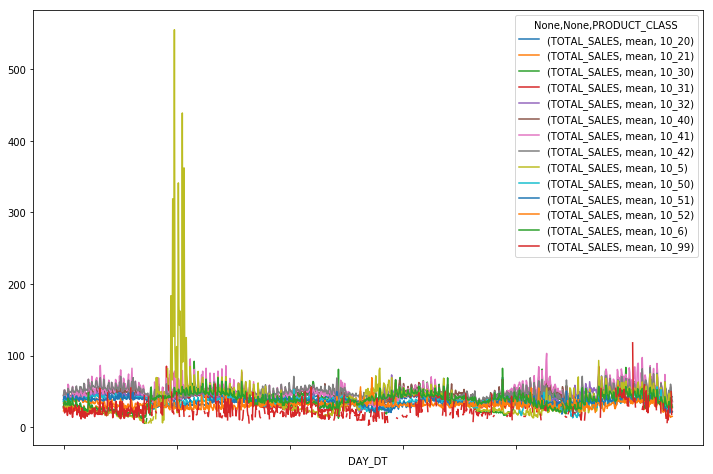

In [48]:
# SUBCLASS 5 across both departments had a huge spike in Sales in Feb/Mar 2016. 
# Other than that most sales are spread evenly across time. 
fig, ax = plt.subplots(figsize=(12, 8))
df_final[df_final.PRODUCT_CLASS.str.contains('^10_')].groupby(
    ['DAY_DT', 'PRODUCT_CLASS']).agg({'TOTAL_SALES': ['mean']}).unstack().plot(ax=ax)

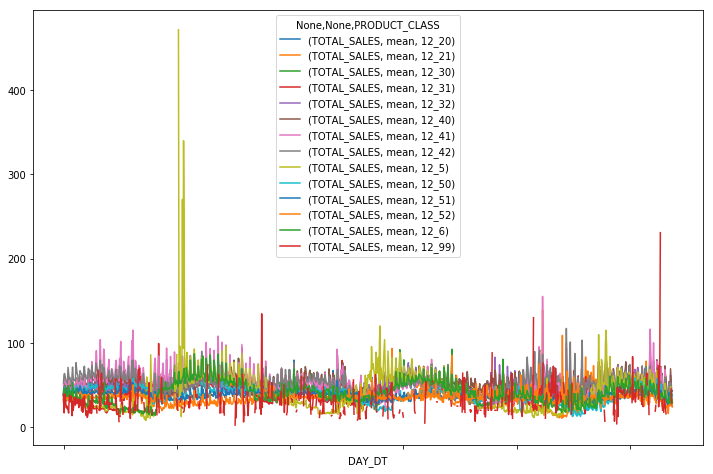

In [49]:
# SUBCLASS 5 across both departments had a huge spike in Sales in Feb/Mar 2016. 
# Other than that most sales are spread evenly across time. 
fig, ax = plt.subplots(figsize=(12, 8))
df_final[df_final.PRODUCT_CLASS.str.contains('^12_')].groupby(
    ['DAY_DT', 'PRODUCT_CLASS']).agg({'TOTAL_SALES': ['mean']}).unstack().plot(ax=ax)

# Does Women Employment % by state impact total sales?

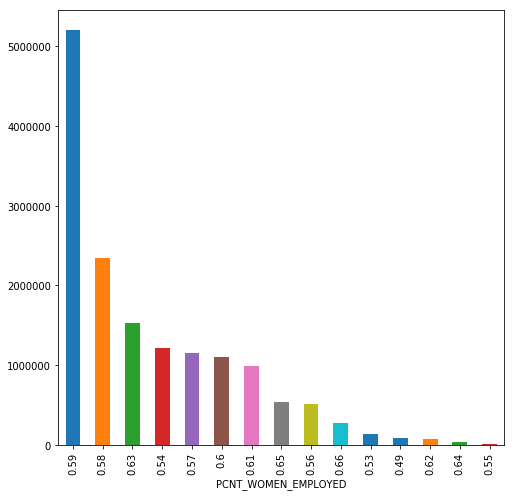

In [50]:
# As seen in the graph below, total sales value is almost similar - but the order of ranking indicates that it 
# is higher for states closer to 60%
fig, ax = plt.subplots(figsize=(8, 8))
df_final.groupby(['PCNT_WOMEN_EMPLOYED'])['TOTAL_UNITS_SOLD'].agg('sum').sort_values(ascending=False).plot.bar(ax=ax)

 # Relationship between Sale Price and Profit - is it linear?
 ## For performance reasons, only one product class (the one with most txns) is used

In [51]:
df_transactions_dept10_subclass20=df_final.loc[(df_final['PRODUCT_CLASS'].str.match('10_20')) ]

In [52]:
df_transactions_dept10_subclass20.columns.tolist()

['DAY_DT',
 'LOC_INDT',
 'DBSKU',
 'ONLINE_FLAG',
 'TOTAL_SALES',
 'TOTAL_UNITS_SOLD',
 'TOTAL_SALES_PRFT',
 'TOTAL_COST',
 'HOLIDAY',
 'MONTH',
 'SEASON',
 'UNIT_COST_PRICE',
 'UNIT_SELLING_PRICE',
 'PROFIT_PER_UNIT',
 'FULL_PRICE_IND',
 'DEPARTMENT',
 'PRODUCT_CLASS',
 'LOC_INDT_SEQ',
 'CITY',
 'STATE',
 'POSTAL_CD',
 'STORE_SIZE',
 'STORE_TYPE_MALL',
 'STORE_TYPE_STRIP',
 'STORE_TYPE_OTHER',
 'STATE_NAME',
 'MEDIAN_HOUSEHLD_INCOME',
 'PCNT_WOMEN_EMPLOYED',
 'MEDIAN_HOUSEHLD_INCOME_BINS']

C:\Users\vijay.agrawal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


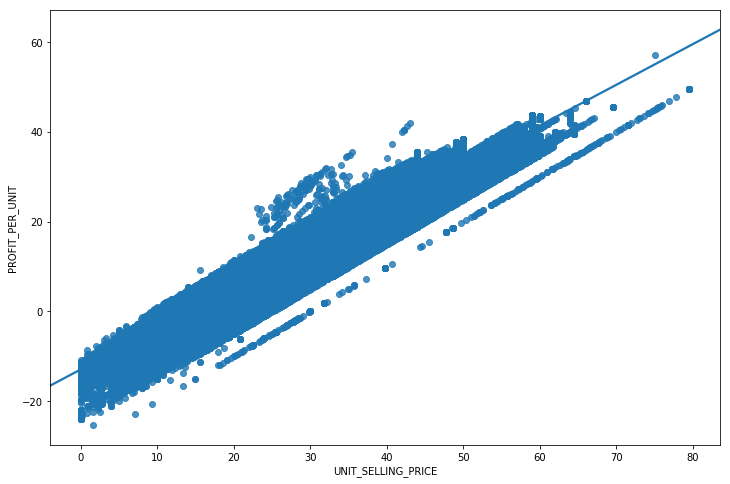

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x=df_transactions_dept10_subclass20["UNIT_SELLING_PRICE"], 
            y=df_transactions_dept10_subclass20["PROFIT_PER_UNIT"], ax=ax)

 ### Relationship between Sale Price and Profit is linear for large part. 
 ### Maximum Sales in the price range  USD 25 to 50. 

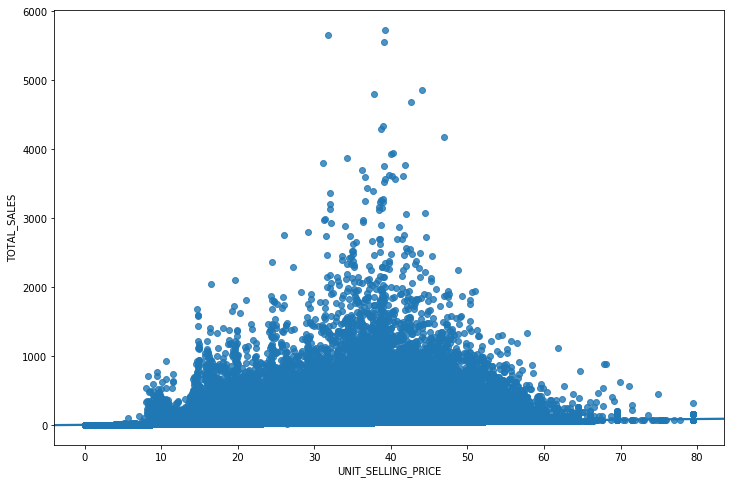

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x=df_transactions_dept10_subclass20["UNIT_SELLING_PRICE"], 
            y=df_transactions_dept10_subclass20["TOTAL_SALES"], ax=ax)

### Unit price beyond 50 is resulting in declining revenue

In [55]:
# Bin Selling Price based on the following cut points - 
cut_points = [0, 10, 20, 30, 40, 50, 60, 70]
labels = [1, 2, 3, 4, 5, 6, 7]
df_transactions_dept10_subclass20['UNIT_SP_BIN'] = pd.cut(df_transactions_dept10_subclass20['UNIT_SELLING_PRICE'],
                                    bins=cut_points,labels=labels,include_lowest=True)

C:\Users\vijay.agrawal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5, 0, 'Selling Price')

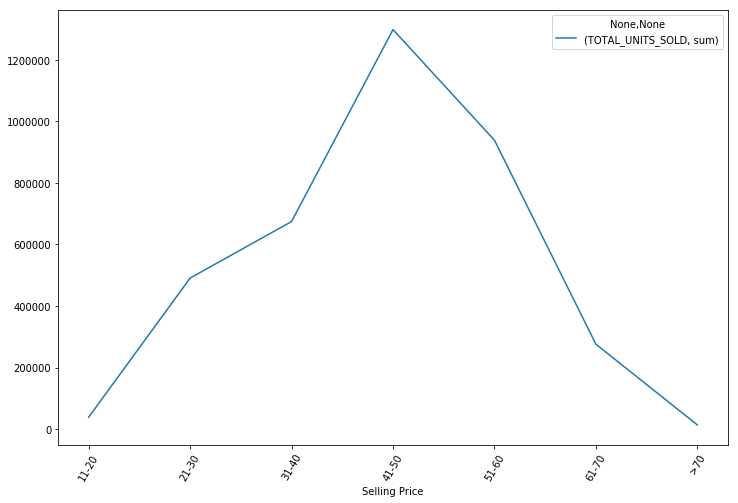

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))
df_transactions_dept10_subclass20.groupby(['UNIT_SP_BIN']).agg({'TOTAL_UNITS_SOLD' : ['sum'] }).plot(rot=60, ax=ax)
labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '>70']
ax.set_xticklabels(labels)
ax.set_xlabel('Selling Price')

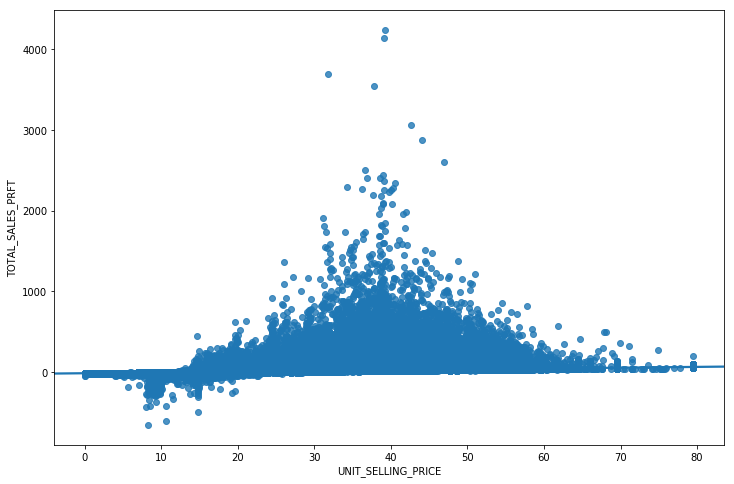

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x=df_transactions_dept10_subclass20["UNIT_SELLING_PRICE"], 
            y=df_transactions_dept10_subclass20["TOTAL_SALES_PRFT"], ax=ax)

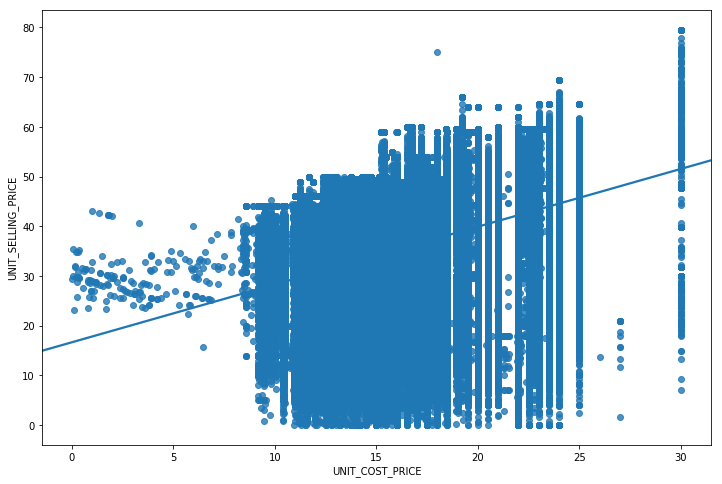

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x=df_transactions_dept10_subclass20["UNIT_COST_PRICE"], 
            y=df_transactions_dept10_subclass20["UNIT_SELLING_PRICE"], ax=ax)

In [59]:
# Export the merged file as transactions_merged.csv
df_final.to_csv('transactions_full_merged.csv', index=False)
df_transactions_dept10_subclass20.to_csv('transactions_full_prod_10_20.csv')

# TimePeriod analysis 

## Observe Sales and Profit by Month

In [60]:
df_final['month'] = pd.to_datetime(df_final['DAY_DT']).dt.to_period('M')

Text(0.5, 0, '')

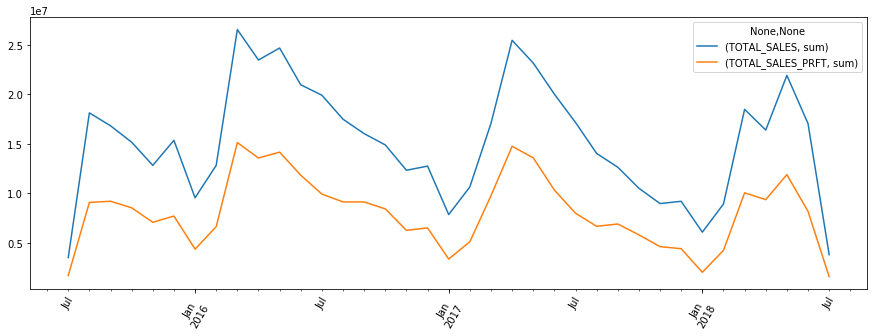

In [61]:
fig, ax = plt.subplots(figsize=(15, 5))
df_final.groupby('month').agg(
    {'TOTAL_SALES' : ['sum'], 'TOTAL_SALES_PRFT' : ['sum'] }).plot.line(rot=60, ax=ax);
ax.set_xlabel('')

### 1) Consistently and Significantly higher Sales and Profits in Mar/Apr.
### 2) Profits are following exact same pattern as Sales** 

## Observe Sales and Profit YoY

In [62]:
df_final['year'] = pd.to_datetime(df_final['DAY_DT']).dt.to_period('Y')

Text(0.5, 0, '')

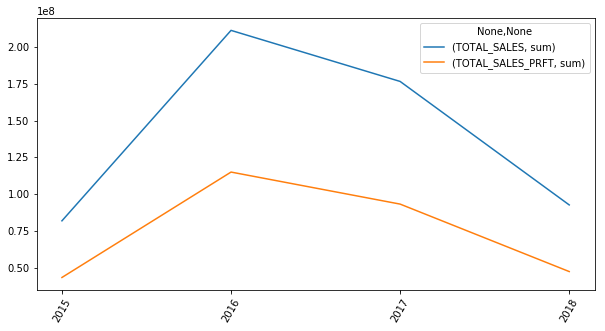

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
df_final.groupby('year').agg(
    {'TOTAL_SALES' : ['sum'], 'TOTAL_SALES_PRFT' : ['sum'] }).plot.line(rot=60, ax=ax);
ax.set_xlabel('')

### YoY Sales and Profits are not growing (in fact reducing a bit)
### Note that 2015 and 2018 only have partial data hence the dips